In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

##### Read csv data

In [5]:
data = pd.read_csv("HR-Employee-Attrition-Data.csv")
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Hypothesis 1: There is a significant difference in attrition rates among different age groups in the organization.

#### Age groups definition:
- Age Group: 18-25 Early Career.
Characteristics: Typically entry-level positions, high mobility, and may be more likely to leave for educational opportunities or career changes.


- Age Group: 26-35 Mid Career.
Characteristics: Establishing their careers, potentially starting families, seeking career advancement opportunities.


- Age Group: 36-45 Late Career.
Characteristics: More stable in their careers, often in mid-management positions, balancing work and family responsibilities.


- Age Group: 46-55 Pre-Retirement:
Characteristics: Experienced employees, often in senior roles, looking for stability and long-term benefits.


- Age Group: 56-65
Characteristics: Approaching retirement, may be considering retirement plans, and benefits.

In [20]:
# grouping ages 
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)


In [21]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,36-45
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,46-55
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,36-45
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,26-35
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,26-35


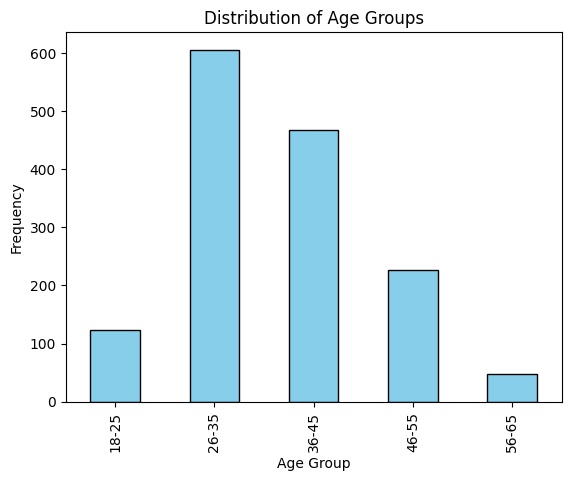

In [130]:

age_group_counts = data['age_group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

Attrition   No  Yes
age_group          
18-25       79   44
26-35      490  116
36-45      425   43
46-55      200   26
56-65       39    8


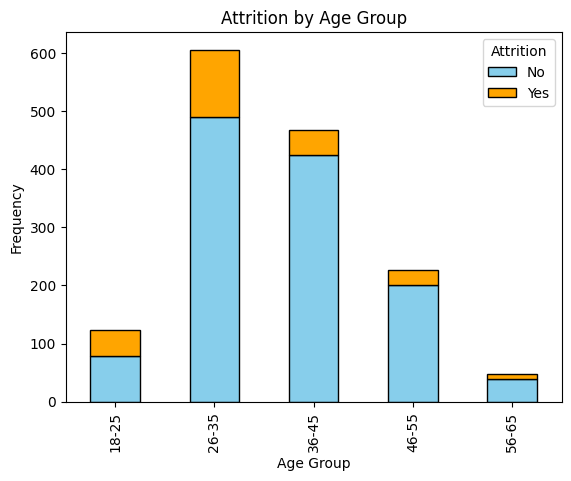

In [131]:

attrition_counts = pd.crosstab(data['age_group'], data['Attrition'])
print(attrition_counts)
attrition_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

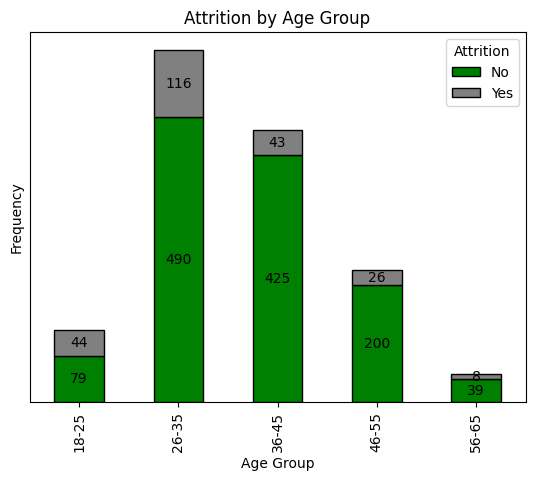

In [132]:

attrition_counts = pd.crosstab(data['age_group'], data['Attrition'])
ax = attrition_counts.plot(kind='bar', stacked=True, color=['green', 'gray'], edgecolor='black')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.yticks([])  
plt.show()

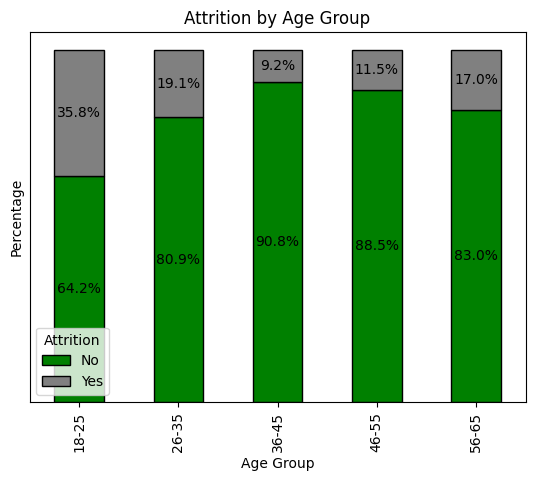

In [133]:

attrition_counts = pd.crosstab(data['age_group'], data['Attrition'])
attrition_perc = attrition_counts.div(attrition_counts.sum(axis=1), axis=0) * 100
ax = attrition_perc.plot(kind='bar', stacked=True, color=['green', 'gray'], edgecolor='black')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0: 
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')
plt.title('Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.yticks([])  
plt.show()

#### Findings and Conclusions

1. The age groups 18-25 and 26-35 fell under the category of young adults.Both the age groups had a high employee population and their attrition rates were high as well.
- Age Group: 18-25: Early Career was characterised by typical entry-level positions, high mobility, and may be more likely to leave for educational opportunities or career changes.
- Age Group: 26-35: Mid Career.
Characteristics: Establishing their careers, potentially starting families, seeking career advancement opportunities.

2. The age group 36-45 fell under the category of middle aged adults and their attrition rate was less significant than that of the other age groups.
- Age Group: 26-35: Mid Career was characterised by establishment of their careers, potentially starting families, seeking career advancement opportunities.

3. The age groups 46-55 and 56-65 fell under the category of old aged adults. The attrition rate took a steady increase as it moved from the former to the latter.
- Age Group: 46-55: Pre-Retirement.
Characteristics: Experienced employees, often in senior roles, looking for stability and long-term benefits.
- Age Group: 56-65
Characteristics: Approaching retirement, may be considering retirement plans, and benefits.




In [26]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,36-45
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,46-55
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,36-45
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,26-35
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,26-35


## Hypothesis 2:  Attririon rate among male employees is higher than that among female employees.

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150


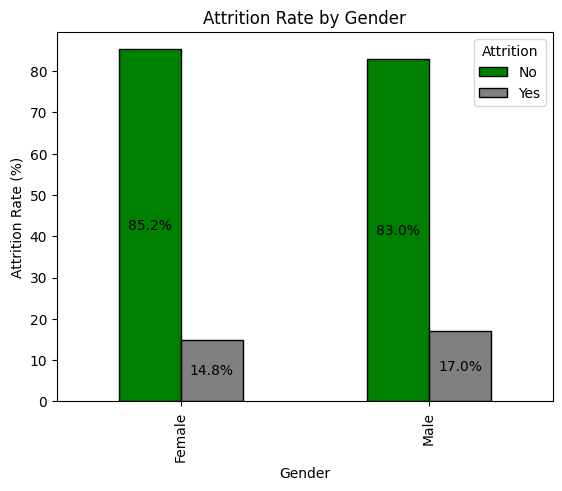

In [134]:

gender_attrition_counts = pd.crosstab(data['Gender'], data['Attrition'])
print(gender_attrition_counts)
gender_attrition_rate = gender_attrition_counts.div(gender_attrition_counts.sum(axis=1), axis=0) * 100
ax = gender_attrition_rate.plot(kind='bar', stacked=False, color=['green', 'gray'], edgecolor='black')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

### Comparison of Work-life balance scores and the different genders.

In [135]:

mean_work_life_balance = data.groupby('Gender')['WorkLifeBalance'].mean().reset_index()

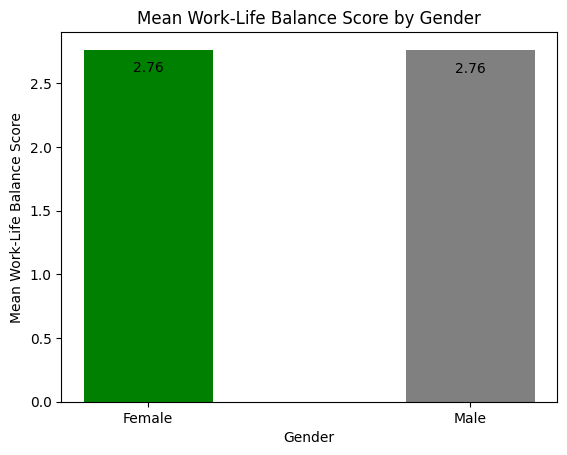

In [136]:

fig, ax = plt.subplots()
bar_width = 0.4
bar_positions = range(len(mean_work_life_balance['Gender']))
bar_heights = mean_work_life_balance['WorkLifeBalance']
bars = plt.bar(bar_positions, bar_heights, bar_width,  color=['green', 'gray'])
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 0.2, f'{height:.2f}', ha='center', va='bottom')
plt.xticks(bar_positions, mean_work_life_balance['Gender'])
plt.title('Mean Work-Life Balance Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Work-Life Balance Score')
plt.show()

### Comparing the varying monthly income across different genders

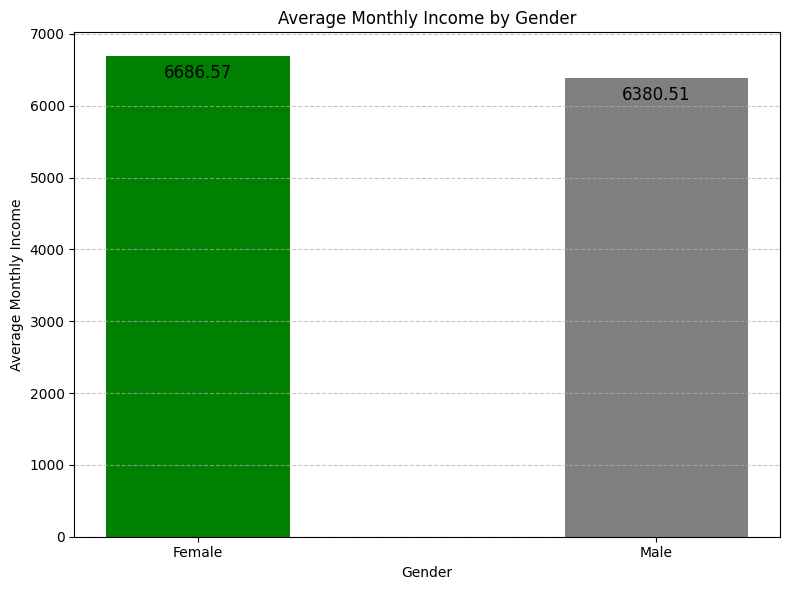

In [137]:

avg_monthly_income = data.groupby('Gender')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_monthly_income['Gender'], avg_monthly_income['MonthlyIncome'], width=0.4,  color=['green', 'gray'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 100, f'{yval:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.title('Average Monthly Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Findings and conclusion report

1. Attrition Rate Analysis
- Males in the organization exhibit a higher attrition rate compared to females.
- The attrition rate among males is observed to be 17% while in  females, it is 2.76%.
2. Monthly Income Analysis
- Males have a lower average monthly income compared to females.
- The average monthly income of males is 6380.51 while that of females is 6686.57.

Factors Contributing to Higher Male Attrition Rate
- Economic Disparities: The lower average monthly income among males may contribute to a higher attrition rate.Employees may leave for better-paying opprtunities elsewhere.
- Work-Life balance: Assessing work-life balance scores on a scale of 1-5 (5 being the best), the males have a relatively low wolr-life balance score which might indicate dissatisfaction or stress contributing to attrition.

### Conclusion
- The combination of lower average monthly income and potentially poorer work-life balance among males likely contributes to their higher attrition rate compared to females.



In [64]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,36-45
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,46-55
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,36-45
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,26-35
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,26-35


### Hypothesis 3: Employees with lower job satisfaction scores are more likely to have higher attrition rates compared to those with higher job satisfaction scores.

In [138]:

grouped = data.groupby(['JobSatisfaction', 'Attrition']).size().unstack(fill_value=0)
grouped_proportion = grouped.div(grouped.sum(axis=1), axis=0)


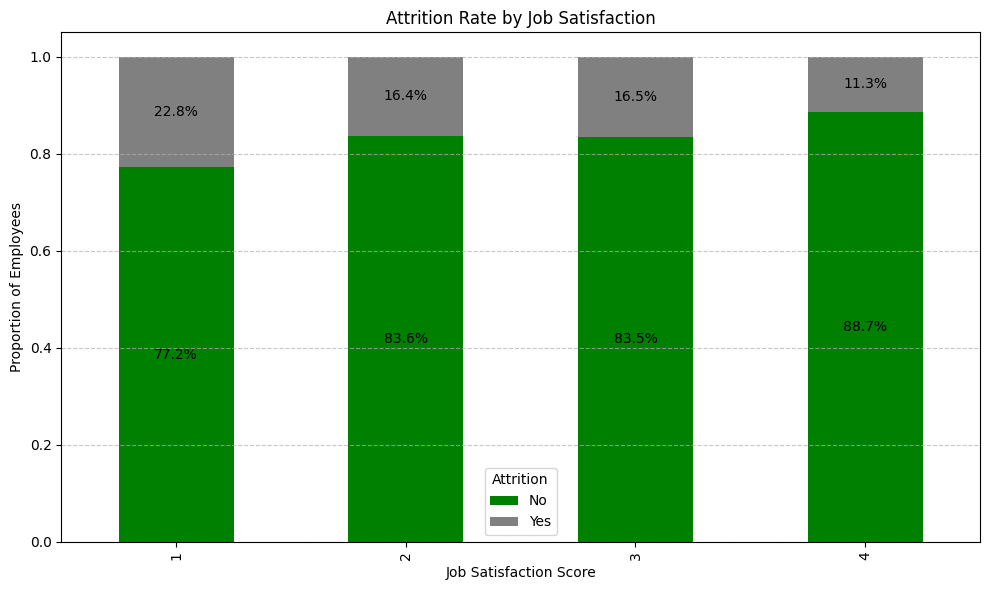

In [139]:

ax = grouped_proportion.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'gray'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height*100:.1f}%', (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center')

plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Proportion of Employees')
plt.legend(title='Attrition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Visual representation using pie chart

In [140]:

total_counts = data['JobSatisfaction'].value_counts()
attrition_counts = data[data['Attrition'] == 'Yes']['JobSatisfaction'].value_counts()
attrition_rates = (attrition_counts / total_counts * 100).fillna(0)

print(attrition_rates)

JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: count, dtype: float64


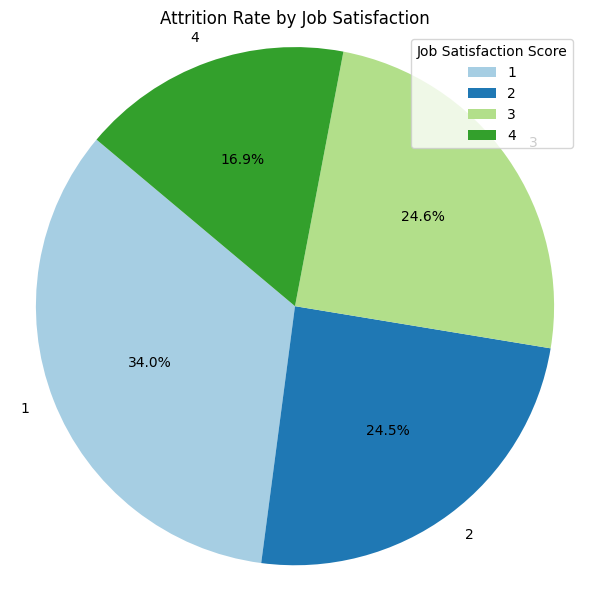

In [141]:
plt.figure(figsize=(6, 6))
colors = plt.cm.Paired(range(len(attrition_rates)))  

plt.pie(attrition_rates, labels=attrition_rates.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Attrition Rate by Job Satisfaction')
plt.axis('equal')  
plt.legend(title='Job Satisfaction Score', loc='upper right')
plt.tight_layout()
plt.show()

### Findings and Conclusions Report

- This investigation aims to investigate the connection between employee attrition rates and job satisfaction. A scale of  1 to 4, 4 being the highest level of satisfaction, is used to measure job satisfaction. Employees with lower work  satisfaction levels tend to have higher attrition rates.

 #### Attrition rates by job satisfaction
 - The analysis reveals a strong inverse relationship between job satisfaction and attrition rates

 Job Satisfaction    Attrition Rate (%)
 1                     34.0%
 2                     24.5%
 3                     24.6%
 4                     16.9%

 #### Factors contributing to low Job Satisfaction
 1. Work-life Balance.
 2. Career Advancement Opportunities.
 3. Work environment.
 4. Job involvement and responsibilities.

 #### Conclusion
 - The analysis clearly indicates that lower job satisfaction is associated with higher attrition rates. Addressing the factors contributing to low job satisfaction can help reduce attrition and improve overall employee morale.



In [93]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,36-45
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,46-55
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,36-45
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,26-35
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,26-35


### Analysis 4: Relationship between different departments and the level of attrition

In [143]:

grouped = data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
grouped['Attrition Rate (%)'] = grouped['Yes'] / (grouped['Yes'] + grouped['No']) * 100
print(grouped)


Attrition                No  Yes  Attrition Rate (%)
Department                                          
Human Resources          51   12           19.047619
Research & Development  828  133           13.839750
Sales                   354   92           20.627803


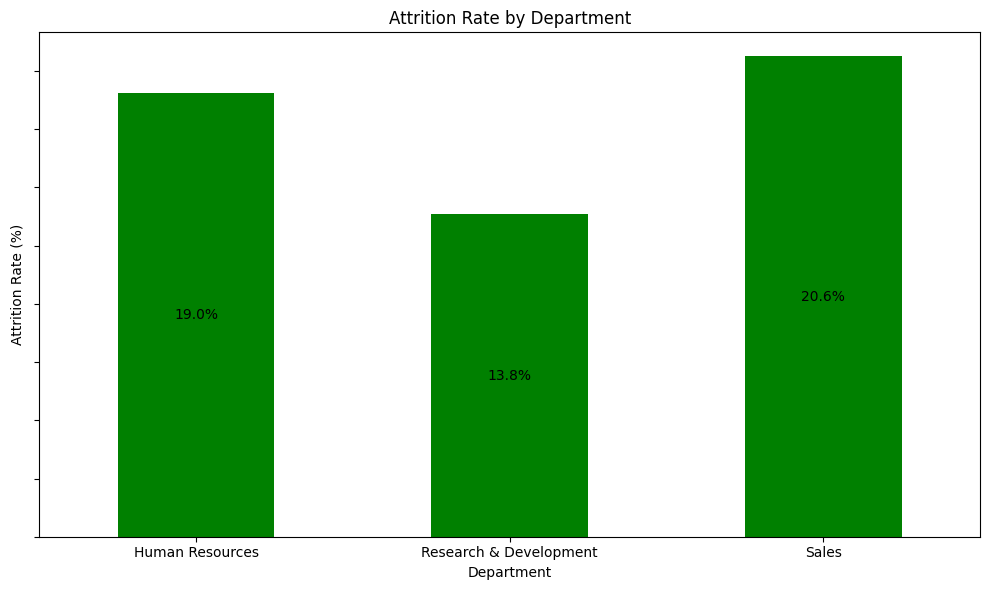

In [144]:

ax = grouped['Attrition Rate (%)'].plot(kind='bar', figsize=(10, 6), color='green', rot=0)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height / 2),
                    ha='center', va='center')
ax.set_yticklabels([])
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
# plt.grid(axis='y',  alpha=0.7)
plt.tight_layout()
plt.show()

#### Hypothesis: There is a significant difference in the average years since the last promotion among different departments, which may contribute to the attrition rates observed in these departments.

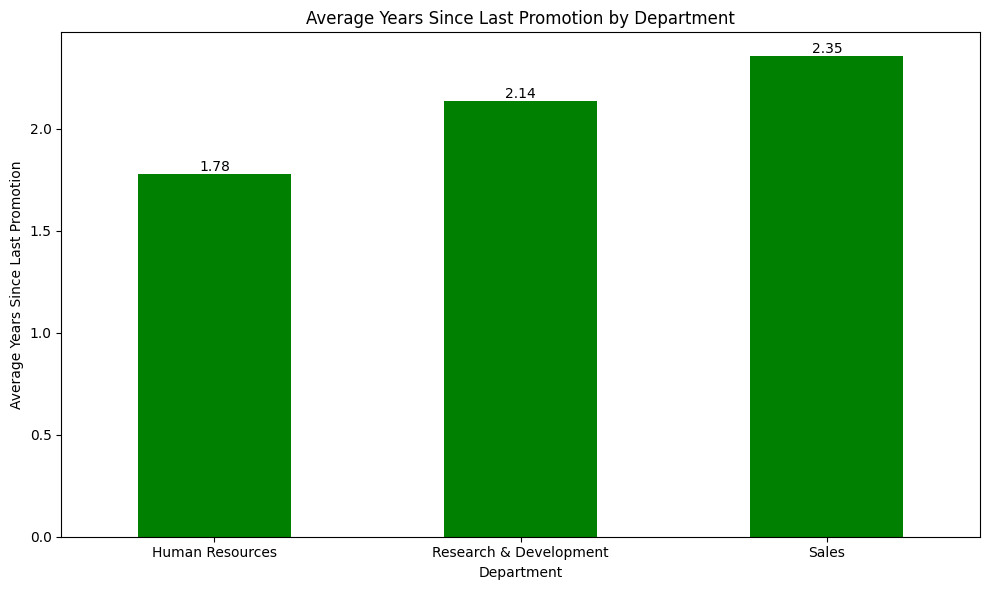

In [145]:

promotion_stats = data.groupby('Department')['YearsSinceLastPromotion'].agg(['mean', 'std'])
plt.figure(figsize=(10, 6))
ax = promotion_stats['mean'].plot(kind='bar',  color='green', rot=0)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.title('Average Years Since Last Promotion by Department')
plt.xlabel('Department')
plt.ylabel('Average Years Since Last Promotion')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Hypothesis: Different business travel frequencies among departments might contribute to the attrition rates observed in these departments.

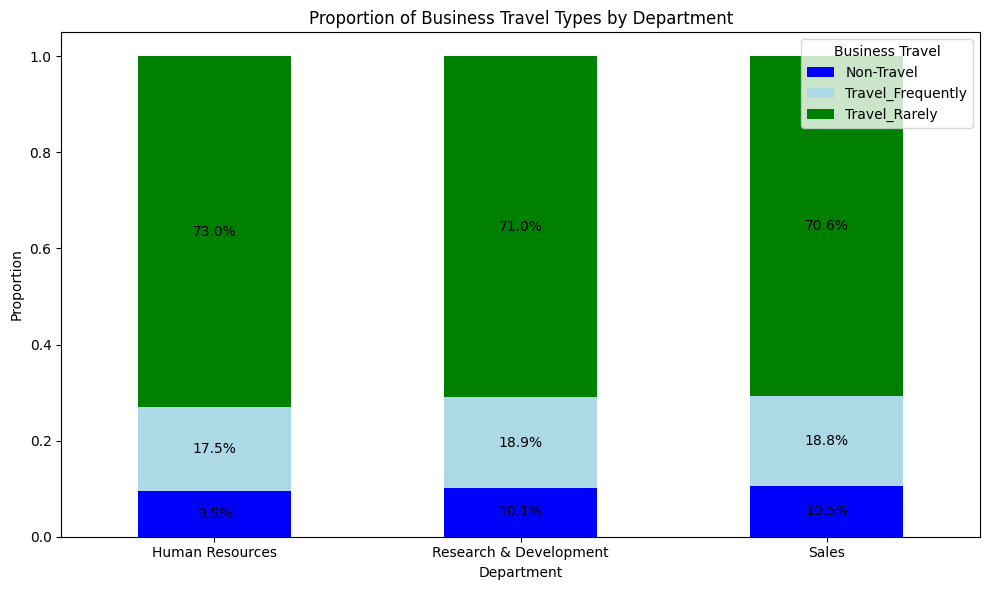

In [146]:

grouped = data.groupby(['Department', 'BusinessTravel']).size().unstack(fill_value=0)
grouped_proportion = grouped.div(grouped.sum(axis=1), axis=0)

colors = ['blue', 'lightblue', 'green']
ax = grouped_proportion.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors,  rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.annotate(f'{height*100:.1f}%', (x + width / 2, y + height / 2),
                    ha='center', va='center')

plt.title('Proportion of Business Travel Types by Department')
plt.xlabel('Department')
plt.ylabel('Proportion')
plt.legend(title='Business Travel')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5.Career progression vs Attrition

In [147]:

contingency_table = pd.crosstab(data['YearsSinceLastPromotion'], data['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
alpha = 0.05 
if p < alpha:
    print("Reject null hypothesis: There is a significant relationship between years since last promotion and attrition rates.")
else:
    print("Fail to reject null hypothesis: There is no significant relationship between years since last promotion and attrition rates.")

Chi-square statistic: 21.844969938120684
P-value: 0.11193387671448679
Fail to reject null hypothesis: There is no significant relationship between years since last promotion and attrition rates.


- There was no relationship between years since last promotion and attrition rates.

## 6. Job Involvement vs Attrition

In [149]:

grouped = data.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).unstack()
grouped = grouped.fillna(0) 
print(grouped)

Attrition             No       Yes
JobInvolvement                    
1               0.662651  0.337349
2               0.810667  0.189333
3               0.855991  0.144009
4               0.909722  0.090278


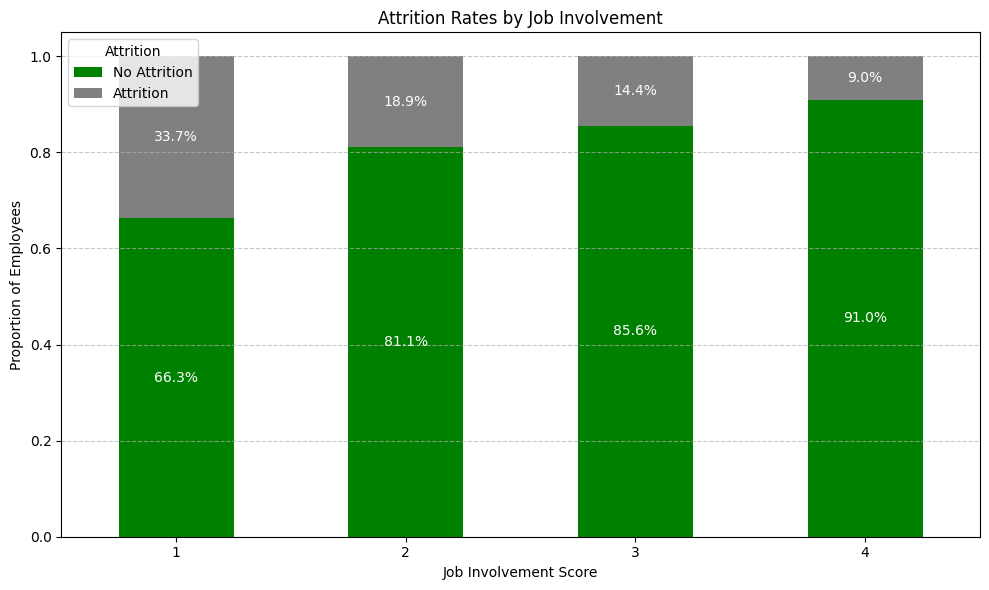

In [150]:

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'gray'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  
        ax.annotate(f'{height*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

plt.title('Attrition Rates by Job Involvement')
plt.xlabel('Job Involvement Score')
plt.ylabel('Proportion of Employees')
plt.legend(title='Attrition', labels=['No Attrition', 'Attrition'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Line graph to show a steady decrease in attrition rates as job involvement scores increase.


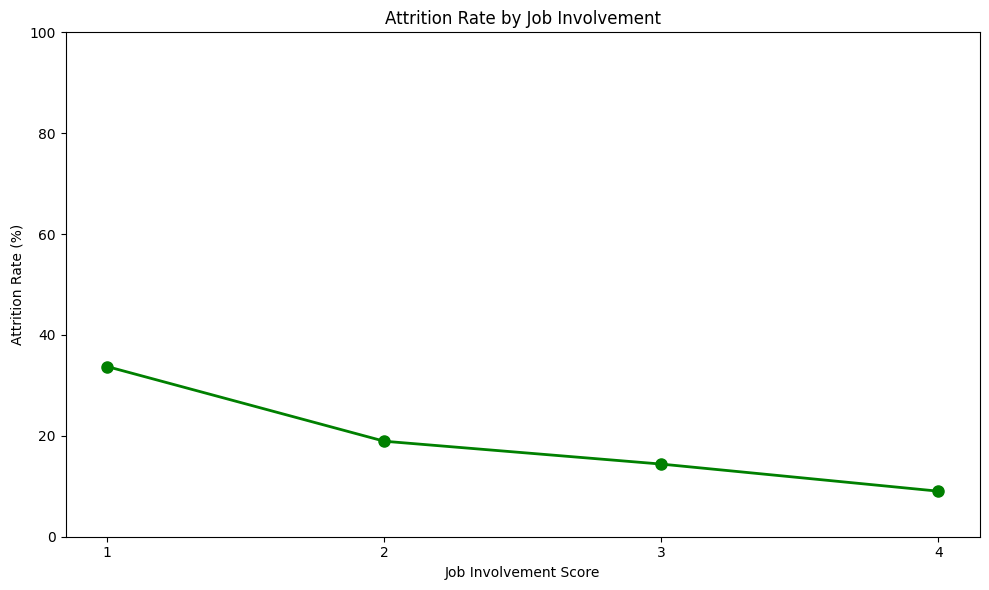

In [151]:

attrition_rates = grouped['Yes'] * 100  


plt.figure(figsize=(10, 6))
plt.plot(attrition_rates.index, attrition_rates.values, marker='o', linestyle='-', color='green', linewidth=2, markersize=8)
plt.title('Attrition Rate by Job Involvement')
plt.xlabel('Job Involvement Score')
plt.ylabel('Attrition Rate (%)')
# plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(attrition_rates.index)
plt.ylim(0, 100) 
plt.tight_layout()
plt.show()